In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Korea_Apt_Data/Final_1_12M_Training.csv')

In [3]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,0,0,89,81,47,43,73,57,19,23,90,87,79,61,11,10,10,8,29,26,27,26,33,31,31,30,88,80,32,30,67,44,2,6,97,96,91,56,3,2,...,67,66,64.0,7,6,7,7,84,88,88,83,52,52,53,55,95,96,98,98,70,70,68,71,35,35,37,38.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-570.607793
1,1,1,88,80,45,41,74,58,20,25,88,85,76,58,6,5,6,6,28,26,27,24,24,22,23,21,88,80,31,29,65,41,1,5,97,96,91,61,2,1,...,45,45,45.0,61,65,62,62,57,59,59,63,61,62,62,64,49,48,43,52,58,58,57,60,59,60,60,59.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-614.800277
2,2,2,88,79,43,39,76,60,22,27,86,83,73,54,4,3,4,4,99,98,98,99,0,0,0,0,88,79,29,25,63,39,1,2,97,96,91,62,2,1,...,0,0,0.0,88,93,97,97,61,63,64,64,99,99,99,99,24,21,19,33,98,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-659.476708
3,3,3,87,78,41,37,77,62,23,29,84,81,69,50,2,2,3,3,99,98,98,99,0,0,0,0,88,79,29,26,59,34,1,0,98,97,92,73,1,0,...,0,0,0.0,73,78,79,79,38,36,35,48,99,99,99,99,22,19,18,31,99,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-705.841233
4,4,4,86,77,39,35,79,65,26,32,79,76,64,43,1,1,2,2,86,87,86,87,2,2,2,1,88,79,30,28,62,37,1,0,98,97,92,67,5,3,...,5,5,3.0,81,86,89,89,21,18,16,38,95,95,94,96,9,7,6,14,92,93,92,94,96,97,96,97.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-754.297240


In [4]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [5]:
df.head(5)

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,89,81,47,43,73,57,19,23,90,87,79,61,11,10,10,8,29,26,27,26,33,31,31,30,88,80,32,30,67,44,2,6,97,96,91,56,3,2,1,10,...,67,66,64.0,7,6,7,7,84,88,88,83,52,52,53,55,95,96,98,98,70,70,68,71,35,35,37,38.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-570.607793
1,88,80,45,41,74,58,20,25,88,85,76,58,6,5,6,6,28,26,27,24,24,22,23,21,88,80,31,29,65,41,1,5,97,96,91,61,2,1,1,8,...,45,45,45.0,61,65,62,62,57,59,59,63,61,62,62,64,49,48,43,52,58,58,57,60,59,60,60,59.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-614.800277
2,88,79,43,39,76,60,22,27,86,83,73,54,4,3,4,4,99,98,98,99,0,0,0,0,88,79,29,25,63,39,1,2,97,96,91,62,2,1,1,7,...,0,0,0.0,88,93,97,97,61,63,64,64,99,99,99,99,24,21,19,33,98,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-659.476708
3,87,78,41,37,77,62,23,29,84,81,69,50,2,2,3,3,99,98,98,99,0,0,0,0,88,79,29,26,59,34,1,0,98,97,92,73,1,0,0,5,...,0,0,0.0,73,78,79,79,38,36,35,48,99,99,99,99,22,19,18,31,99,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-705.841233
4,86,77,39,35,79,65,26,32,79,76,64,43,1,1,2,2,86,87,86,87,2,2,2,1,88,79,30,28,62,37,1,0,98,97,92,67,5,3,3,12,...,5,5,3.0,81,86,89,89,21,18,16,38,95,95,94,96,9,7,6,14,92,93,92,94,96,97,96,97.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-754.297240


In [6]:
df

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,89,81,47,43,73,57,19,23,90,87,79,61,11,10,10,8,29,26,27,26,33,31,31,30,88,80,32,30,67,44,2,6,97,96,91,56,3,2,1,10,...,67,66,64.0,7,6,7,7,84,88,88,83,52,52,53,55,95,96,98,98,70,70,68,71,35,35,37,38.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-570.607793
1,88,80,45,41,74,58,20,25,88,85,76,58,6,5,6,6,28,26,27,24,24,22,23,21,88,80,31,29,65,41,1,5,97,96,91,61,2,1,1,8,...,45,45,45.0,61,65,62,62,57,59,59,63,61,62,62,64,49,48,43,52,58,58,57,60,59,60,60,59.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-614.800277
2,88,79,43,39,76,60,22,27,86,83,73,54,4,3,4,4,99,98,98,99,0,0,0,0,88,79,29,25,63,39,1,2,97,96,91,62,2,1,1,7,...,0,0,0.0,88,93,97,97,61,63,64,64,99,99,99,99,24,21,19,33,98,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-659.476708
3,87,78,41,37,77,62,23,29,84,81,69,50,2,2,3,3,99,98,98,99,0,0,0,0,88,79,29,26,59,34,1,0,98,97,92,73,1,0,0,5,...,0,0,0.0,73,78,79,79,38,36,35,48,99,99,99,99,22,19,18,31,99,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-705.841233
4,86,77,39,35,79,65,26,32,79,76,64,43,1,1,2,2,86,87,86,87,2,2,2,1,88,79,30,28,62,37,1,0,98,97,92,67,5,3,3,12,...,5,5,3.0,81,86,89,89,21,18,16,38,95,95,94,96,9,7,6,14,92,93,92,94,96,97,96,97.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-754.297240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
df.info

<bound method DataFrame.info of         q_all_sell_unit_price_danji  ...  sell_unit_price_sidanji_gap
0                                89  ...                  -570.607793
1                                88  ...                  -614.800277
2                                88  ...                  -659.476708
3                                87  ...                  -705.841233
4                                86  ...                  -754.297240
...                             ...  ...                          ...
105558                           51  ...                   607.005497
105559                           51  ...                   267.124023
105560                           50  ...                   306.468599
105561                           49  ...                   355.575230
105562                           48  ...                   416.376005

[105563 rows x 253 columns]>

In [8]:
df.describe()

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
count,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,...,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000,105563.000000
mean,75.698161,62.997973,46.654206,46.375274,75.529665,63.616816,47.381194,47.152999,52.305448,50.662827,48.330154,48.156778,50.559656,48.354925,47.883757,47.645671,48.828794,48.435891,48.739246,48.879901,50.229380,48.909391,48.718471,48.629965,80.149588,67.372953,45.073719,44.043633,80.384756,68.178150,44.832015,44.084556,56.627493,53.340536,46.695357,44.981414,52.674678,48.148755,46.933992,46.493961,...,49.726135

In [ ]:
# sns.heatmap(df.isnull())

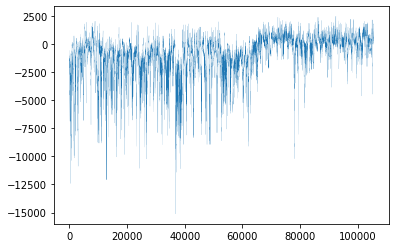

In [9]:
df['sell_unit_price_sidanji_gap'].plot(linewidth = 0.1)

In [10]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1:].values

In [11]:
X.shape

(105563, 252)

In [12]:
Y.shape

(105563, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(Y)
X = scaler_X.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [15]:
X_train.shape

(84450, 252)

In [16]:
X_test.shape

(21113, 252)

In [17]:
X_train

array([[1.        , 0.98989899, 0.91919192, ..., 0.36144578, 0.39759036,
        0.29166667],
       [1.        , 1.        , 0.98989899, ..., 0.15662651, 0.21686747,
        0.13888889],
       [0.45918367, 0.22222222, 0.18181818, ..., 0.26506024, 0.25301205,
        0.20833333],
       ...,
       [0.86734694, 0.76767677, 0.83838384, ..., 0.85542169, 0.85542169,
        0.90277778],
       [0.57142857, 0.35353535, 0.35353535, ..., 0.44578313, 0.42168675,
        0.36111111],
       [0.55102041, 0.32323232, 0.32323232, ..., 0.90361446, 0.92771084,
        0.83333333]])

In [18]:
Y_train

array([[0.54944001],
       [0.44472314],
       [0.91307577],
       ...,
       [0.79632189],
       [0.8868596 ],
       [0.9423341 ]])

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (252, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               126500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 628,001
Trainable params: 628,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [22]:
epochs_hist = model.fit( X_train, Y_train, epochs = 20, batch_size = 50, validation_split= 0.2 )

Epoch 1/20
1352/1352 [==============================] - 7s 3ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 2/20
1352/1352 [==============================] - 4s 3ms/step - loss: 7.8644e-04 - val_loss: 7.0069e-04
Epoch 3/20
1352/1352 [==============================] - 6s 4ms/step - loss: 7.2514e-04 - val_loss: 5.6725e-04
Epoch 4/20
1352/1352 [==============================] - 4s 3ms/step - loss: 6.4653e-04 - val_loss: 7.3655e-04
Epoch 5/20
1352/1352 [==============================] - 4s 3ms/step - loss: 6.0812e-04 - val_loss: 5.6680e-04
Epoch 6/20
1352/1352 [==============================] - 4s 3ms/step - loss: 5.8526e-04 - val_loss: 7.9930e-04
Epoch 7/20
1352/1352 [==============================] - 4s 3ms/step - loss: 5.4530e-04 - val_loss: 4.9868e-04
Epoch 8/20
1352/1352 [==============================] - 4s 3ms/step - loss: 5.3687e-04 - val_loss: 4.4755e-04
Epoch 9/20
1352/1352 [==============================] - 4s 3ms/step - loss: 5.2061e-04 - val_loss: 5.7774e-04
Epoch 10/20
1352/1

In [23]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation Loss')

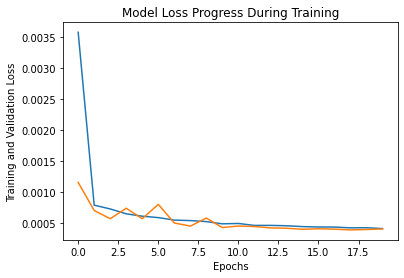

In [24]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')

Text(0, 0.5, 'True Values')

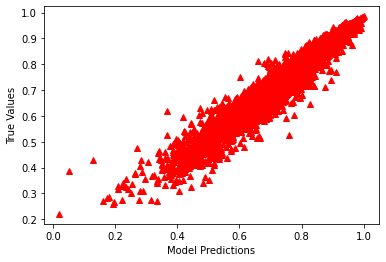

In [25]:
y_predict = model.predict(X_test)
plt.plot(Y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [26]:
 y_predict_orig = scaler_Y.inverse_transform(y_predict)

need two scaler

In [27]:
 y_test_orig = scaler_Y.inverse_transform(Y_test)

Text(0, 0.5, 'True Values')

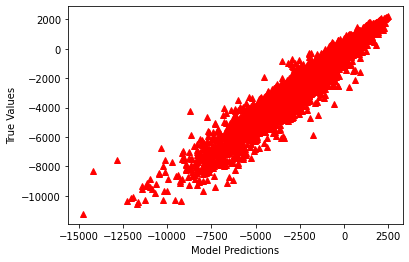

In [28]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')